# Implementation of SVM with Gaussian Kernel (RBF)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Prepare the Data

In [3]:
# Load the dataset
df_train = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/train.csv')
df_test = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/test.csv')

# Separate features and target variable
X_train = df_train.drop(['binary_attack'], axis=1)
y_train = df_train['binary_attack']

X_test = df_test.drop(['binary_attack'], axis=1)
y_test = df_test['binary_attack']

# Split the training data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (100778, 42) (100778,)
Validation shape: (25195, 42) (25195,)
Test shape: (22544, 42) (22544,)


## Scale the Data

In [4]:
# Standardize features
scaler = StandardScaler()

# Scale training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Train the SVM with RBF Kernel

In [12]:
# Train SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9965072435006945


## Test the Mode

In [13]:
# Evaluate the model on the test set
y_test_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8497161107168204


## Confusion Matrix and Classification Report

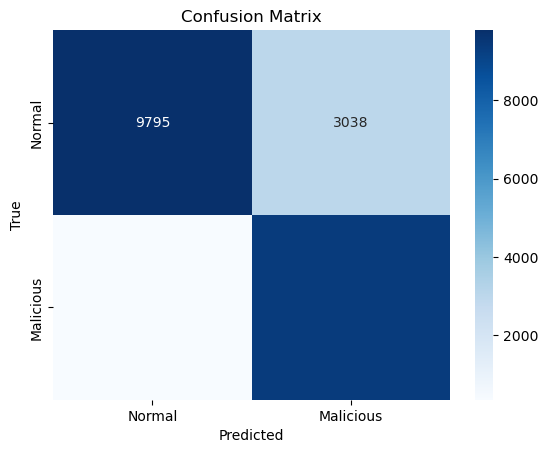

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     12833
           1       0.75      0.96      0.85      9711

    accuracy                           0.85     22544
   macro avg       0.86      0.86      0.85     22544
weighted avg       0.87      0.85      0.85     22544



In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_test_pred))

## Hyperparameter Tuning with GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid.best_params_)

# Use the best model
best_svm_model = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=11.9min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 9.3min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  29.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.8min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 9.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 8.9min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 9.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 6.7min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=11.2min
[CV] END .......................C=100, gamma=0.1

## Evaluate the Optimized Model

Optimized Test Accuracy: 0.8177785663591199


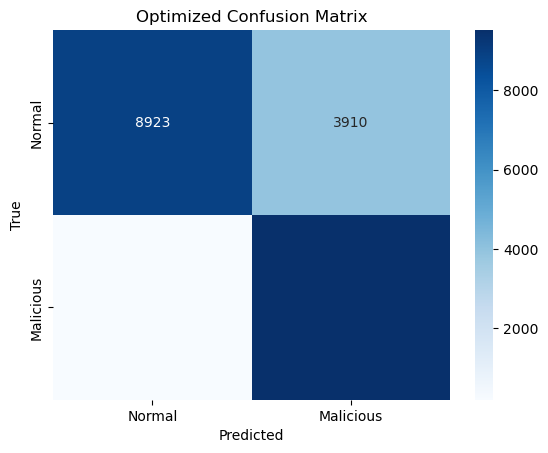

              precision    recall  f1-score   support

           0       0.98      0.70      0.81     12833
           1       0.71      0.98      0.82      9711

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



In [15]:
# Evaluate the optimized model on the test set
y_test_pred_optimized = best_svm_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_test_pred_optimized)
print(f"Optimized Test Accuracy: {optimized_accuracy}")

# Confusion matrix for the optimized model
cm_optimized = confusion_matrix(y_test, y_test_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Optimized Confusion Matrix')
plt.show()

# Classification report for the optimized model
print(classification_report(y_test, y_test_pred_optimized))

## Save the Trained SVM Model

In [16]:
import joblib

# Save the SVM model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/"
model_filename = "NSL-KDD_SVM_Model.joblib"
model_path = model_folder + model_filename

# Save the model using joblib
joblib.dump(best_svm_model, model_path)
print(f"SVM model saved to: {model_path}")


SVM model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_SVM_Model.joblib
